In [27]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from IPython.display import display, Markdown

# ignore warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Lataa aineisto
file_path = '../data/house_data_test.csv'
data = pd.read_csv(file_path)

# Checking for missing values in the dataset
missing_values = data.isnull().sum()
# Displaying columns with missing values and the number of missing values in each
missing_values = missing_values[missing_values > 0]

# Muunnetaan boolean-arvot numeerisiksi
data = data.replace({True:1, False:0})
# Convert 'date' to datetime format
data['date'] = pd.to_datetime(data['date'])

# Extract month and create a season column
data['month'] = data['date'].dt.month

# Define a function to label seasons based on months
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

# Apply the function to create a season column
data['season'] = data['month'].apply(get_season)

# Convert 'season' to numerical values using one-hot encoding
data = pd.get_dummies(data, columns=['season'], drop_first=True)

# Drop the original 'date' column
data = data.drop(['date'], axis=1)

In [28]:
# Convert categorical features to numerical
data['has_basement'] = data['has_basement'].astype(int)
data['renovated'] = data['renovated'].astype(int)
data['nice_view'] = data['nice_view'].astype(int)
data['perfect_condition'] = data['perfect_condition'].astype(int)
data['has_lavatory'] = data['has_lavatory'].astype(int)
data['single_floor'] = data['single_floor'].astype(int)

In [29]:
# Define features and target variable
X = data.drop(['price'], axis=1)  # Features
y = data['price']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")


Mean Absolute Error: 78658.58365526953
R^2 Score: 0.7522180800259404


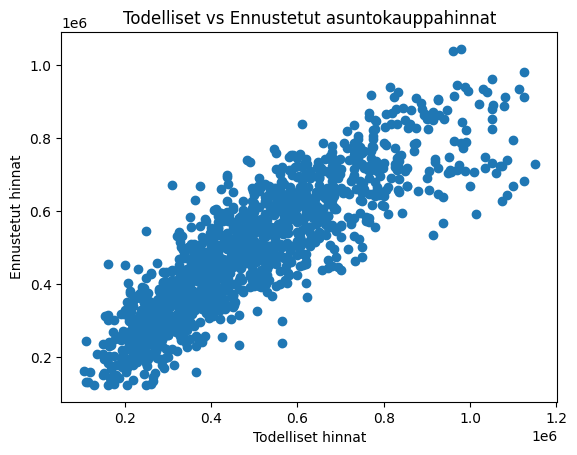

In [34]:
plt.scatter(y_test, y_pred)
plt.xlabel("Todelliset hinnat")
plt.ylabel("Ennustetut hinnat")
plt.title("Todelliset vs Ennustetut asuntokauppahinnat")
plt.show()

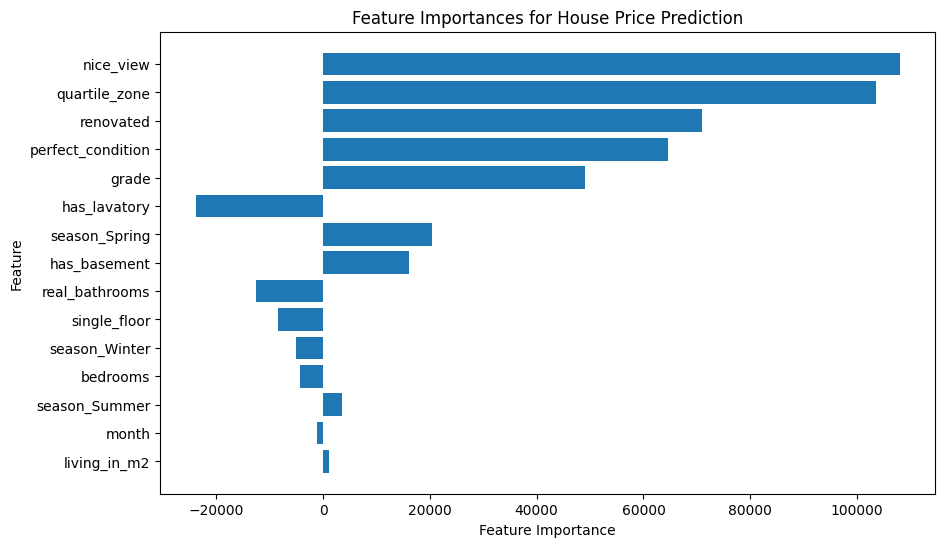

,Feature,Importance
5,nice_view,108059.339870
11,quartile_zone,103463.598745
4,renovated,70888.504812
6,perfect_condition,64516.018093
1,grade,49134.644333
8,has_lavatory,-23895.906295
12,season_Spring,20322.984438
2,has_basement,16122.825647
7,real_bathrooms,-12627.759592
9,single_floor,-8494.543787


In [32]:
# Retrieve the feature names and their corresponding coefficients
feature_names = X.columns
coefficients = model.coef_

# Create a DataFrame to organize feature importances
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefficients
})

# Sort by absolute importance to see the most impactful features at the top
feature_importances['AbsImportance'] = np.abs(feature_importances['Importance'])
feature_importances = feature_importances.sort_values(by='AbsImportance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for House Price Prediction')
plt.gca().invert_yaxis()
plt.show()

# Display the feature importances for further inspection
feature_importances[['Feature', 'Importance']]
